In [2]:
import numpy as np
from datetime import date
import matplotlib.pyplot as plt
import pandas as pd
import netCDF4 as nc
import xarray as xr
import Libraries.marineHeatWaves_AS_v2 as mhw_v2

%matplotlib inline

In [3]:
local_path = "D:/Repositories/too_much_big_data/"
file_name = 'NOAA_SST_KoreanPeninsula_1981-2025_FULL.nc'
path = local_path + file_name

data = xr.open_dataset(path)
sst = data['sst']

data

<xarray.Dataset> Size: 232MB
Dimensions:  (time: 16085, lat: 60, lon: 60)
Coordinates:
  * time     (time) datetime64[ns] 129kB 1981-09-01 1981-09-02 ... 2025-09-14
  * lat      (lat) float32 240B 30.12 30.38 30.62 30.88 ... 44.38 44.62 44.88
  * lon      (lon) float32 240B 120.1 120.4 120.6 120.9 ... 134.4 134.6 134.9
Data variables:
    sst      (time, lat, lon) float32 232MB ...
Attributes:
    Conventions:       CF-1.5
    title:             NOAA SST Korean Peninsula Region (1981-2025)
    institution:       NOAA/NCDC
    source:            NOAA/NCDC  ftp://eclipse.ncdc.noaa.gov/pub/OI-daily-v2/
    history:           Thu Aug 24 13:34:17 2017: ncatted -O -a References,glo...
    dataset_title:     NOAA Daily Optimum Interpolation Sea Surface Temperature
    References:        https://www.psl.noaa.gov/data/gridded/data.noaa.oisst....
    comment:           Reynolds, et al.(2007) Daily High-Resolution-Blended A...
    description:       Daily Sea Surface Temperature data extracted for Korea...
    spatial_coverage:  Lat: 30.0-45.0°N, Lon: 120.0-135.0°E
    created_date:      2025-09-24 09:18:01
    creator:           Korean Peninsula SST Analysis

In [4]:
start_year = 1982
end_year = 2011

In [5]:
# 년도(구간) 설정
from datetime import datetime, timedelta

start_date = datetime(start_year, 1, 1)
end_date = datetime(end_year, 12, 31)

year_list = []
year_datetime_list = []

current_date = start_date
while current_date <= end_date:
    formatted_date = current_date.strftime(f"%Y-{"%m".zfill(2)}-{"%d".zfill(2)}")
    year_datetime_list.append(current_date)
    year_list.append(formatted_date)
    current_date += timedelta(days=1)

print(year_datetime_list)

[datetime.datetime(1982, 1, 1, 0, 0), datetime.datetime(1982, 1, 2, 0, 0), datetime.datetime(1982, 1, 3, 0, 0), datetime.datetime(1982, 1, 4, 0, 0), datetime.datetime(1982, 1, 5, 0, 0), datetime.datetime(1982, 1, 6, 0, 0), datetime.datetime(1982, 1, 7, 0, 0), datetime.datetime(1982, 1, 8, 0, 0), datetime.datetime(1982, 1, 9, 0, 0), datetime.datetime(1982, 1, 10, 0, 0), datetime.datetime(1982, 1, 11, 0, 0), datetime.datetime(1982, 1, 12, 0, 0), datetime.datetime(1982, 1, 13, 0, 0), datetime.datetime(1982, 1, 14, 0, 0), datetime.datetime(1982, 1, 15, 0, 0), datetime.datetime(1982, 1, 16, 0, 0), datetime.datetime(1982, 1, 17, 0, 0), datetime.datetime(1982, 1, 18, 0, 0), datetime.datetime(1982, 1, 19, 0, 0), datetime.datetime(1982, 1, 20, 0, 0), datetime.datetime(1982, 1, 21, 0, 0), datetime.datetime(1982, 1, 22, 0, 0), datetime.datetime(1982, 1, 23, 0, 0), datetime.datetime(1982, 1, 24, 0, 0), datetime.datetime(1982, 1, 25, 0, 0), datetime.datetime(1982, 1, 26, 0, 0), datetime.datetime(19

In [7]:
for lt in range(60):
    for ln in range(60):
        print(lt, ln)
        globals()[f'sst_{lt}_{ln}'] = sst.sel(time=year_list, lat=30.125+0.25*lt, lon=120.625+0.25*ln).values

0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19
0 20
0 21
0 22
0 23
0 24
0 25
0 26
0 27
0 28
0 29
0 30
0 31
0 32
0 33
0 34
0 35
0 36
0 37
0 38
0 39
0 40
0 41
0 42
0 43
0 44
0 45
0 46
0 47
0 48
0 49
0 50
0 51
0 52
0 53
0 54
0 55
0 56
0 57
0 58


KeyError: "not all values found in index 'lon'. Try setting the `method` keyword argument (example: method='nearest')."

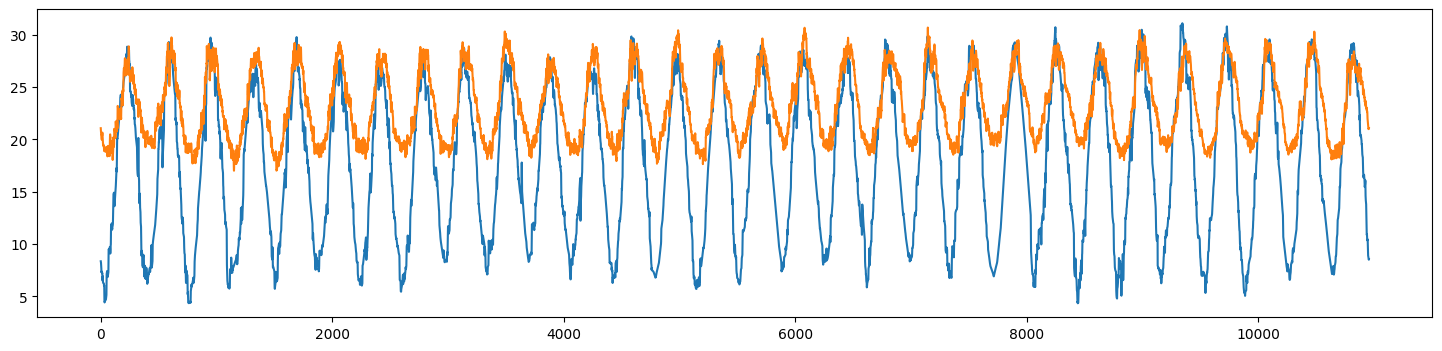

array([21.06    , 20.779999, 20.73    , ..., 21.      , 21.      ,
       21.05    ], dtype=float32)

In [32]:
c_sst = sst.sel(time=year_list, lat=30.125, lon=120.625).values
c2_sst = sst.sel(time=year_list, lat=30.125, lon=134.875).values

plt.figure(figsize=(18, 4))
plt.plot(c_sst)
plt.plot(c2_sst)
plt.show()
c2_sst

In [12]:
t = np.array([i.toordinal() for i in year_datetime_list])
t

array([723546, 723547, 723548, ..., 734500, 734501, 734502])

In [17]:
Time_Period = [start_year, end_year]
mhws, clim = mhw_v2.detect(t, c_sst, climatologyPeriod = Time_Period, MHWPeriod = Time_Period, smoothPercentileWidth = 31, pctile = 90)
m = mhws['duration'].index(max(mhws['duration']))
mhws['date_start'][m]

datetime.date(2003, 10, 12)